# Medicare pricing

https://www.cms.gov/Research-Statistics-Data-and-Systems/Statistics-Trends-and-Reports/Medicare-Provider-Charge-Data/Physician-and-Other-Supplier2014.html

In [145]:
import sys
import pandas as pd 
import numpy as np
import seaborn as sns

#plotly has some nice maps
from plotly.offline import init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 

import matplotlib.pyplot as plt
%matplotlib inline

In [100]:
df = pd.read_csv('../Medicare_Provider_Util_Payment_PUF_CY2014.txt', delimiter='\t', dtype={'nppes_provider_zip': str}, error_bad_lines=False)

In [15]:
df.shape

(9316307, 29)

In [84]:
# uncomment to take the first X rows to do most of our exploration (will be much faster)
# df = df.sample(frac=0.01)

In [13]:
df.columns

Index([u'npi', u'nppes_provider_last_org_name', u'nppes_provider_first_name',
       u'nppes_provider_mi', u'nppes_credentials', u'nppes_provider_gender',
       u'nppes_entity_code', u'nppes_provider_street1',
       u'nppes_provider_street2', u'nppes_provider_city',
       u'nppes_provider_zip', u'nppes_provider_state',
       u'nppes_provider_country', u'provider_type',
       u'medicare_participation_indicator', u'place_of_service', u'hcpcs_code',
       u'hcpcs_description', u'hcpcs_drug_indicator', u'line_srvc_cnt',
       u'bene_unique_cnt', u'bene_day_srvc_cnt',
       u'average_Medicare_allowed_amt', u'average_submitted_chrg_amt',
       u'average_Medicare_payment_amt', u'average_Medicare_standard_amt',
       u'Unnamed: 26', u'Unnamed: 27', u'Unnamed: 28'],
      dtype='object')

In [14]:
df.head(5)

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_mi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,...,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,average_Medicare_standard_amt,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,357.0,341,357,141.05,416.546218,107.517871,106.731232,NaN,NaN,NaN
1,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,98.0,98,98,207.79,611.000000,152.551224,153.306837,NaN,NaN,NaN
2,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,104.0,65,104,40.10,119.000000,30.835385,30.708269,NaN,NaN,NaN
3,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,1418.0,596,1418,73.66,217.000000,56.297757,56.098209,NaN,NaN,NaN
4,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,175.0,104,175,106.12,312.000000,82.398171,81.612743,NaN,NaN,NaN


In [21]:
df.drop(df.columns[-3:], axis=1, inplace=True)

In [269]:
# rename some columns
CLEANED_PAYMENT_HEADER_MAP = {
    'average_Medicare_standard_amt' : 'avg_medicare_standardized_amount',
    'average_Medicare_payment_amt' : 'avg_medicare_payment_amount',
    "average_submitted_chrg_amt" : 'avg_submitted_charge_amount',
    "average_Medicare_allowed_amt" : "avg_medicare_allowed_amount",
    "line_srvc_cnt" : "line_item_service_count",
    "bene_unique_cnt" : "beneficiary_unique_count",
    'bene_day_srvc_cnt' : "unique_beneficiary_per_day_services_count",
}

df.rename(columns=CLEANED_PAYMENT_HEADER_MAP, inplace=True)

In [270]:
df.isnull().sum()

npi                                                0
nppes_provider_last_org_name                     155
nppes_provider_first_name                     403179
nppes_provider_mi                            2510407
nppes_credentials                             591752
nppes_provider_gender                         403127
nppes_entity_code                                  0
nppes_provider_street1                             2
nppes_provider_street2                       5170995
nppes_provider_city                                2
nppes_provider_zip                                 0
nppes_provider_state                               0
nppes_provider_country                             0
provider_type                                      0
medicare_participation_indicator                   0
place_of_service                                   0
hcpcs_code                                         0
hcpcs_description                                  0
hcpcs_drug_indicator                          

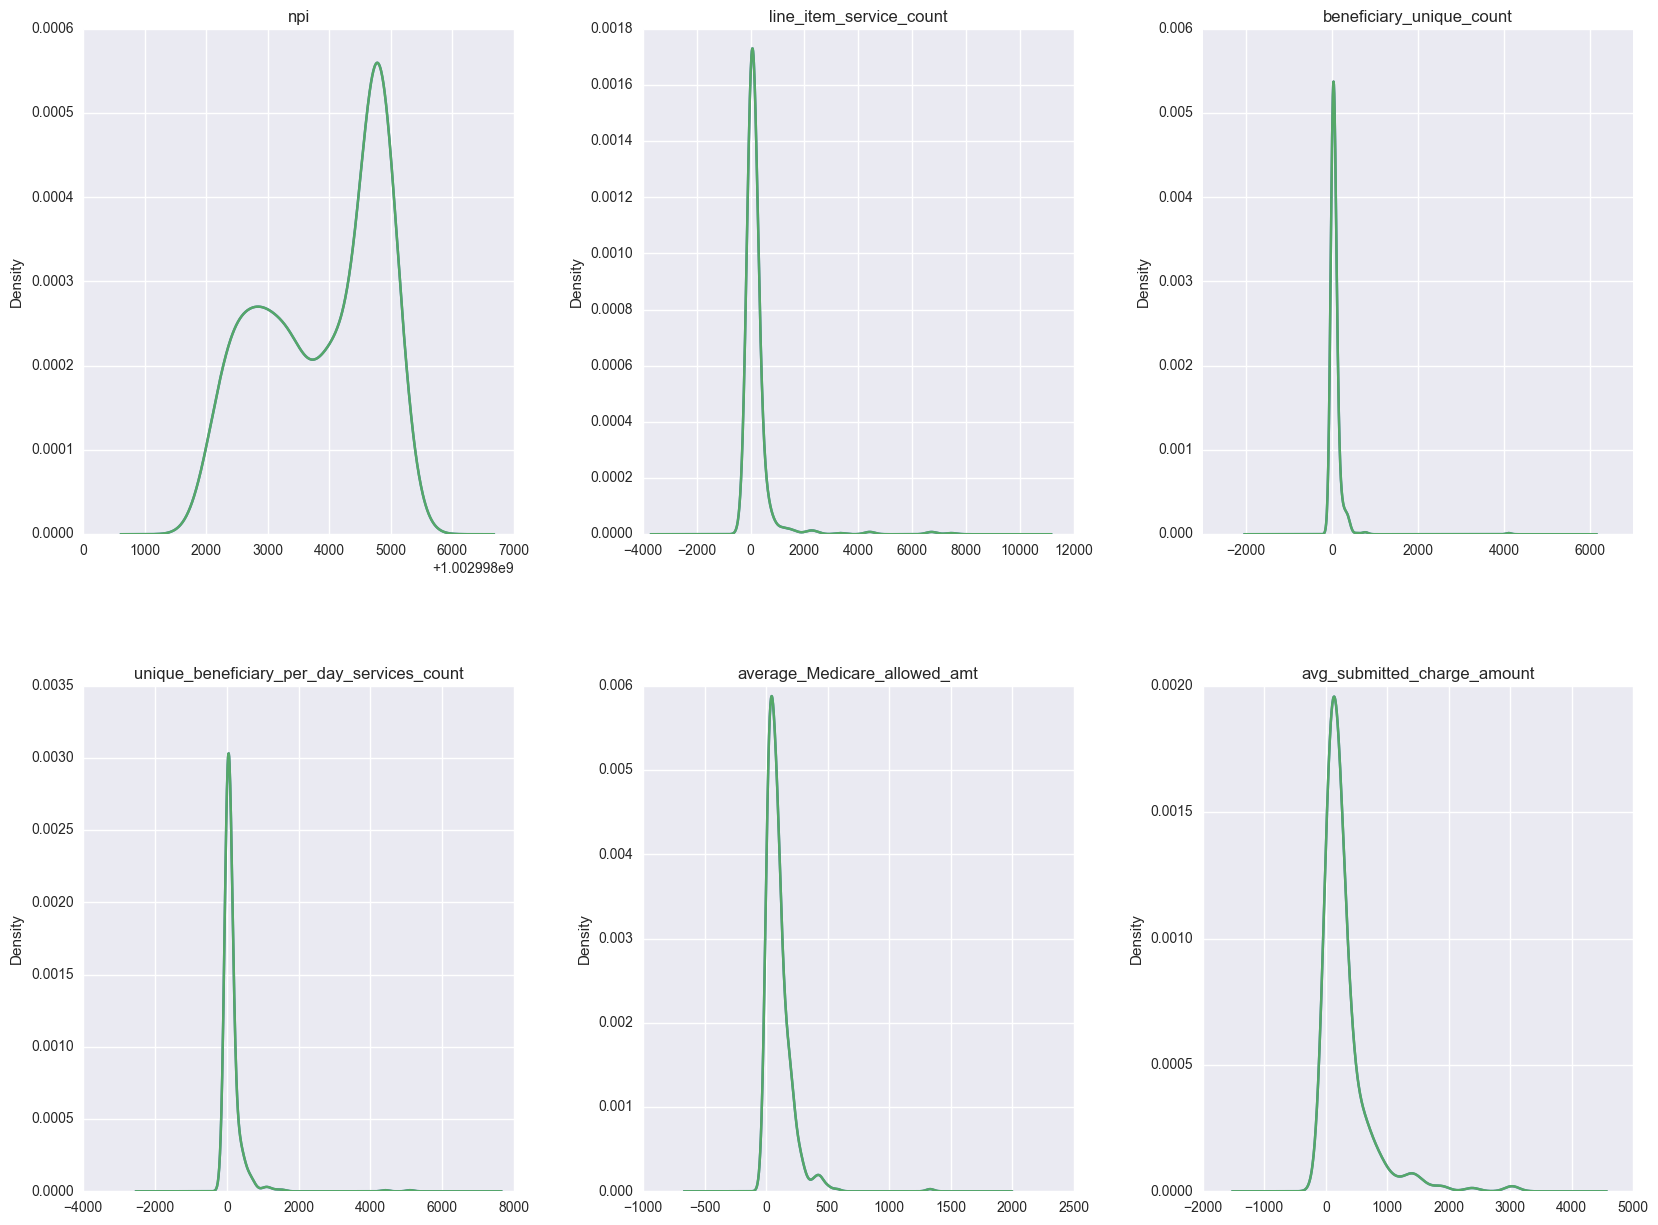

In [42]:
df.select_dtypes(include=['float64','int64'])
num_df = df.select_dtypes(include=['float64','int64'])
n_cols = 3
n_rows = len(df.select_dtypes(include=['float64','int64']).columns) / n_cols

fig, axs = plt.subplots(n_rows, n_cols, figsize = (20,15))

fig.subplots_adjust(hspace=.3, wspace=.3)

for k in axs:
    for i,j in zip(num_df, axs.flat):
        g = num_df[i].plot.kde(ax = j, title = i)
        g.get_xaxis().tick_bottom()
        g.get_yaxis().tick_left()

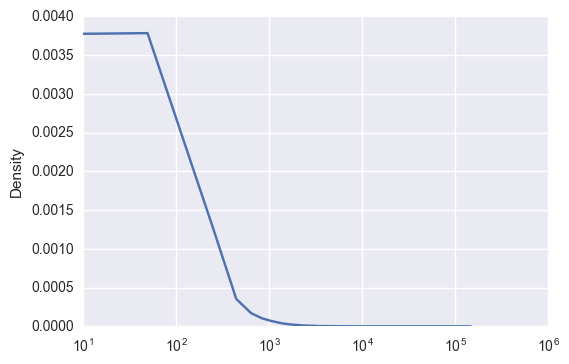

In [282]:
# zoom in on charged amount

df.avg_submitted_charge_amount.plot(kind='kde', logx=True)

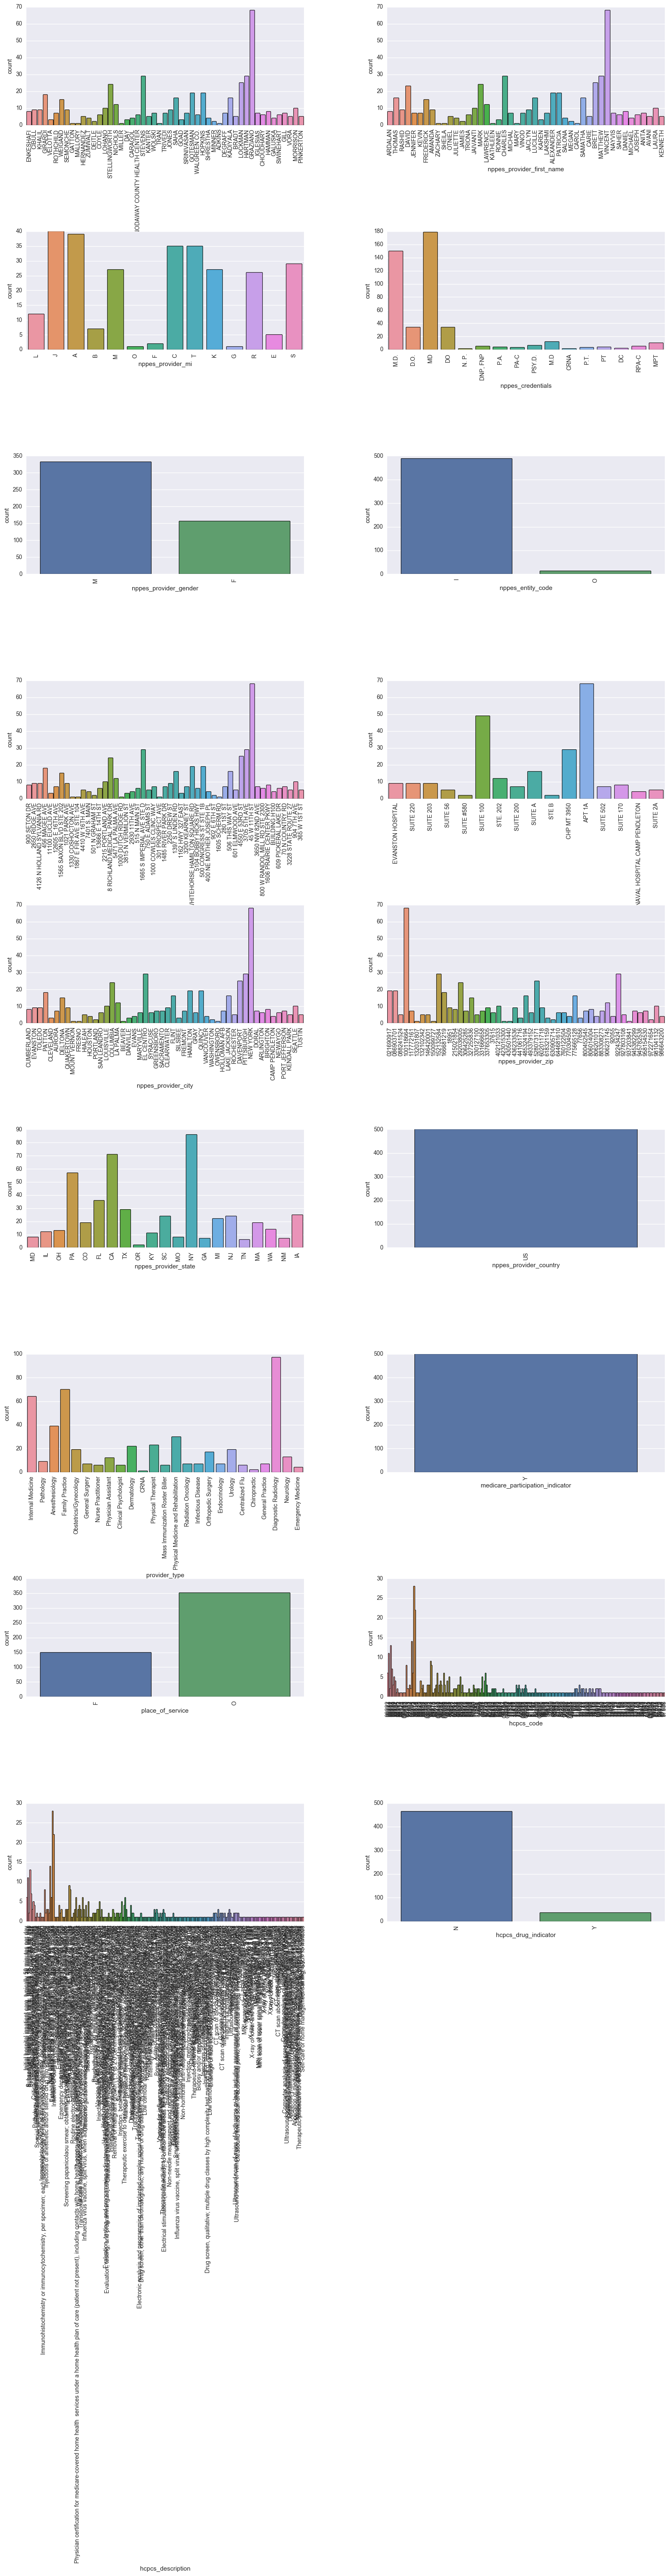

In [43]:
#object features
obj_df = df.select_dtypes(include=['object'])
n_cols = 2
n_rows = len(obj_df.columns) / n_cols

fig, axs = plt.subplots(n_rows, n_cols, figsize = (20,60))

fig.subplots_adjust(hspace=.9, wspace=.3)

for k in axs:
    for i,j in zip(obj_df.columns, axs.flat):
        g = sns.countplot(x=i, data=obj_df, ax=j)
        plt.setp(j.get_xticklabels(), rotation=90)

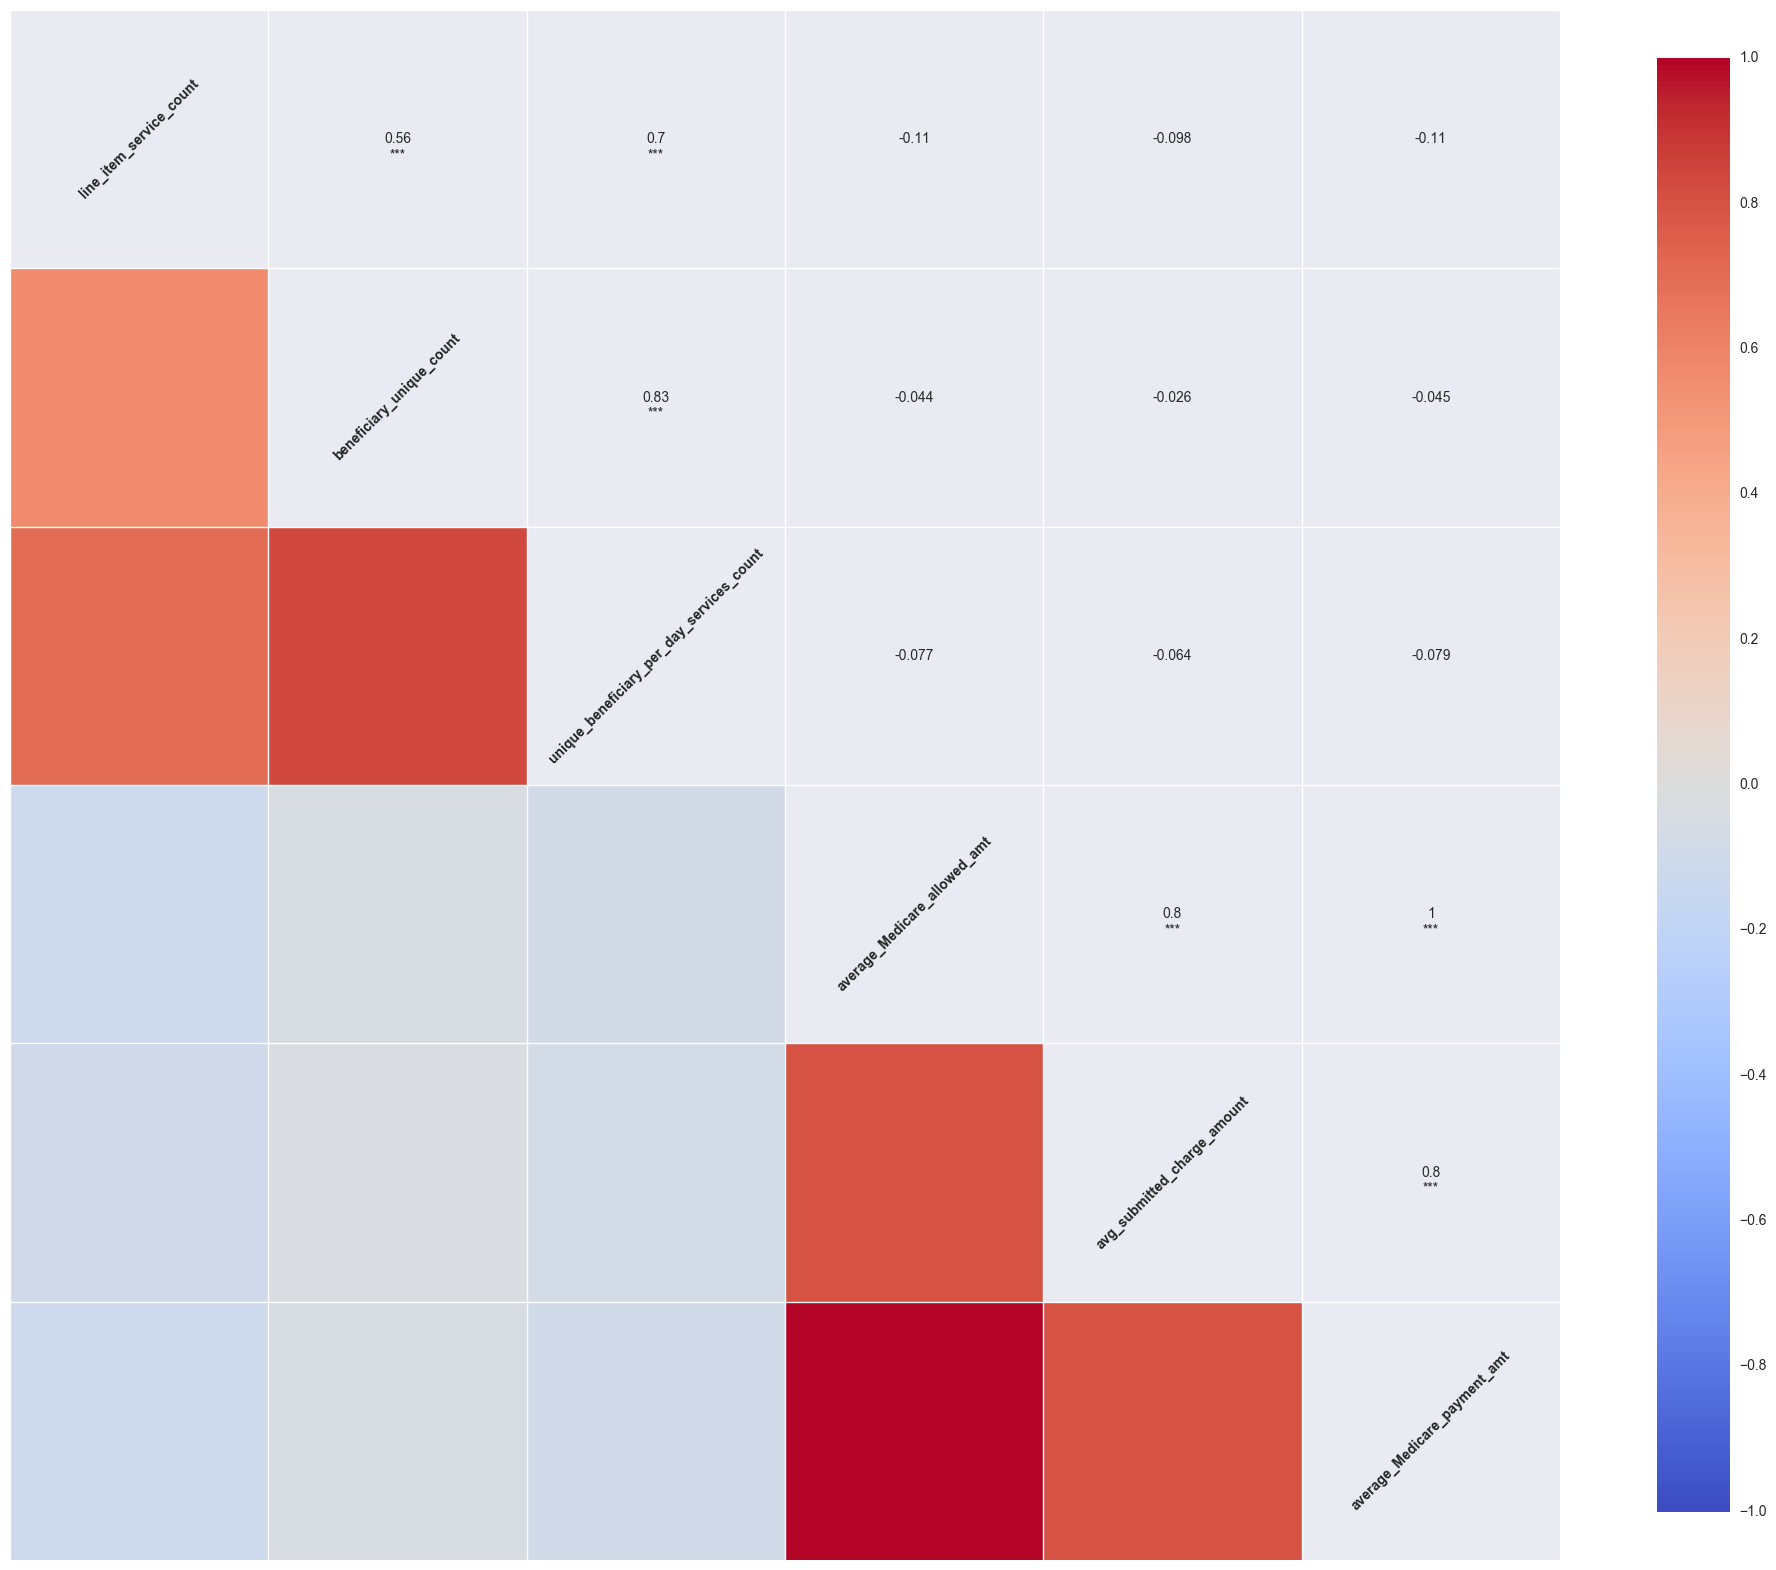

In [44]:
import seaborn as sns
# plot correlation of numeric features
numeric_features = num_df.columns
fig, ax = plt.subplots(figsize=(25, 25))
sns.linearmodels.corrplot(df[numeric_features[1:-1]], ax=ax)

In [273]:
# how much was actually paid

print df['avg_medicare_payment_amount'].sum()
print df['avg_submitted_charge_amount'].sum()

700139332.527
2956785588.21


# Lets ask some specific questions

In [264]:
# Where are all the procedures?

# using zipcode is too hard, since they are not all clean, and I couldn't find a package which was up to date enough
# (most have zips from 2004 / 2006 -> many errors)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

# graphs a series, where keys are states
def make_plotly(series, title):
    global data, layout
    data = [ dict(
            type='choropleth',
#            colorscale=scl,
            locations = series.keys(),
            z = series.values.astype(float),
            locationmode = 'USA-states',
            #text = seq['text'],
            marker = dict(
                line = dict (
                    color = 'rgb(255,255,255)',
                    width = 2
                ) ),
            colorbar = dict(
                title="",
                )
            ) ]

    layout = dict(
            title = title,
            geo = dict(
                scope='usa',
                projection=dict( type='albers usa' ),
                showlakes = False,
                lakecolor = 'rgb(255, 255, 255)'
            ),
        )
    
    fig = dict(data=data, layout=layout)
    iplot(fig)

state_counts = df['nppes_provider_state'].value_counts()

make_plotly(state_counts, 'Number procedures per state')

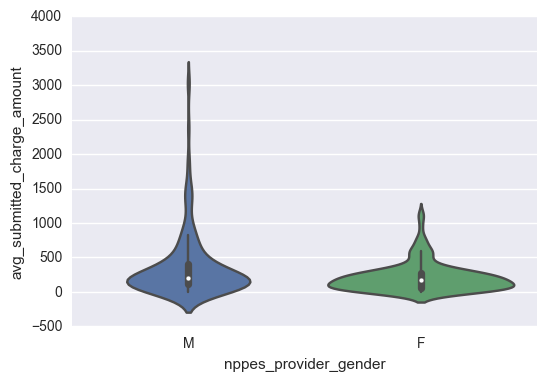

In [93]:
# Do men charge more than women?

# it's getting one-hot in here
# df.isMale = df.nppes_provider_gender.map(lambda x: x == 'M')
# df.isFemale = df.nppes_provider_gender.map(lambda x: x == 'F')

sns.violinplot(data=df, x="nppes_provider_gender", y="avg_submitted_charge_amount")

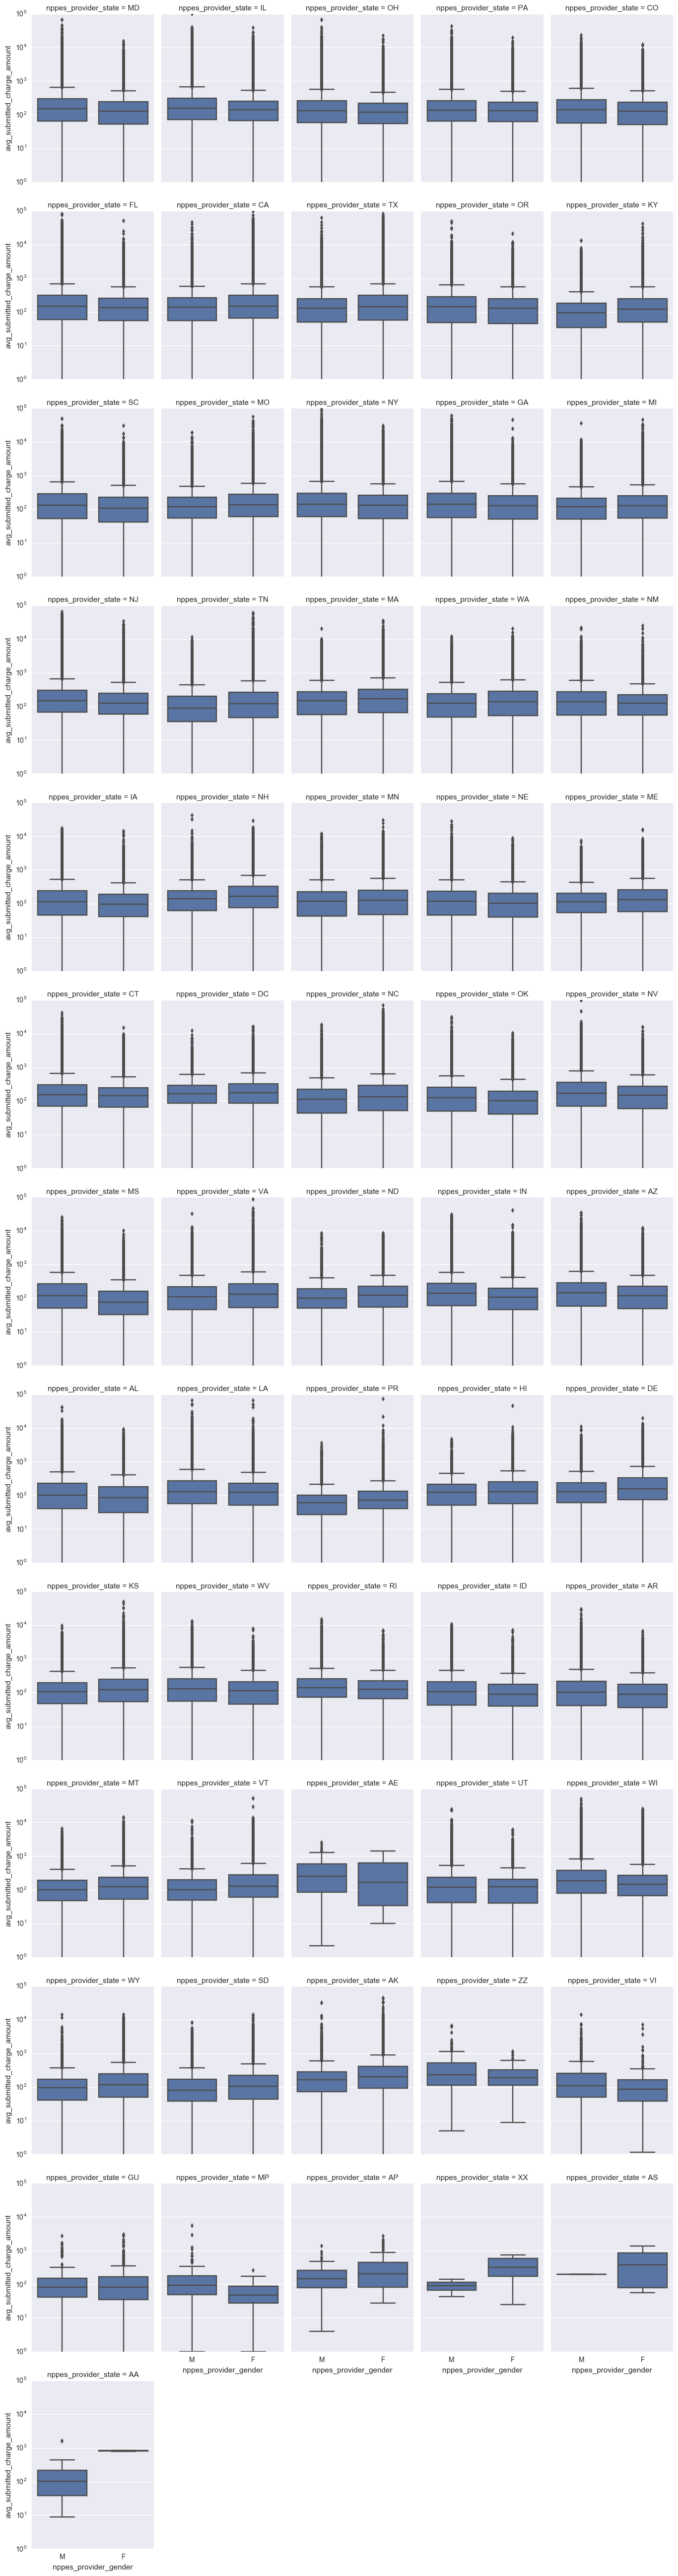

In [114]:
# Do men charge more per state?

g = sns.FacetGrid(df, col="nppes_provider_state", size=4, aspect=.7, col_wrap=5)
g.map(sns.boxplot, "nppes_provider_gender", "avg_submitted_charge_amount")
g.fig.get_axes()[0].set_yscale('log')

In [247]:
# What are all the procedures?
# figure out distribution of just the most common codes, since there are so many

code_count = df.hcpcs_code.value_counts().sort_values(ascending=False)
code_count_dict = code_count.to_dict()

code_threshold = 1000
common_codes = code_count[code_count > code_threshold]

print('Number of codes:', len(code_count))
print('Common codes:', len(common_codes))

('Number of codes:', 5972)
('Common codes:', 880)


In [244]:
# text descriptions

code_df = df[['hcpcs_code', 'hcpcs_description']]
code_dict = dict(zip(code_df.hcpcs_code.map(str), code_df.hcpcs_description))

print "Most common procedures:"
common_codes.head(25).keys().map(lambda code: code_dict[str(code)])

Most common procedures:


array([ 'Established patient office or other outpatient visit, typically 15 minutes',
       'Established patient office or other outpatient, visit typically 25 minutes',
       'Subsequent hospital inpatient care, typically 25 minutes per day',
       'New patient office or other outpatient visit, typically 30 minutes',
       'New patient office or other outpatient visit, typically 45 minutes',
       'Established patient office or other outpatient visit, typically 10 minutes',
       'Administration of influenza virus vaccine',
       'Initial hospital inpatient care, typically 70 minutes per day',
       'Subsequent hospital inpatient care, typically 35 minutes per day',
       'Initial hospital inpatient care, typically 50 minutes per day',
       'Established patient office or other outpatient, visit typically 40 minutes',
       'Insertion of needle into vein for collection of blood sample',
       'Routine EKG using at least 12 leads including interpretation and report',
      

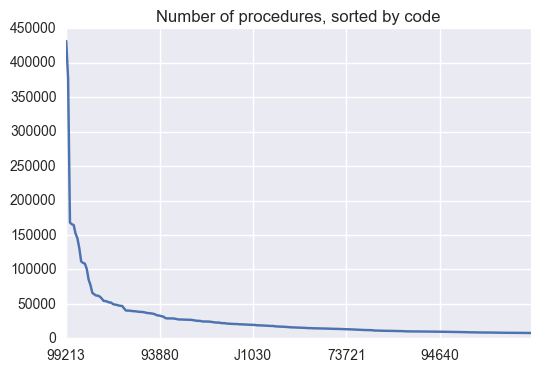

In [245]:
# plot number of procedures for common codes

top_number_to_plot = 250

common_codes.head(top_number_to_plot).plot(kind='line', title='Number of procedures, sorted by code')

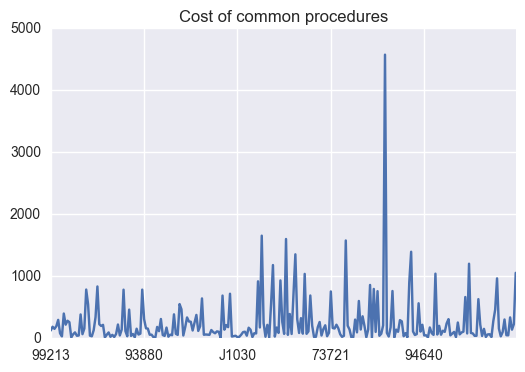

In [250]:
# what are the most expensive ones?

cost_df = df[['hcpcs_code', 'avg_submitted_charge_amount']]

mean_costs = cost_df.groupby('hcpcs_code').mean()
mean_costs = mean_costs['avg_submitted_charge_amount']
mean_costs_dict = mean_costs.to_dict()

code_count_df = pd.DataFrame({
        'count': code_count,
        'mean_cost': code_count.keys().map(lambda code: mean_costs_dict[str(code)]),
        'description': code_count.keys().map(lambda code: code_dict[str(code)])
    })

code_count_df.head(top_number_to_plot).mean_cost.plot(title='Cost of common procedures')

In [258]:
# most expensive procedures

spensive = code_count_df.mean_cost.sort_values(ascending=False).head(25)
code_count_df.loc[spensive.index]

,count,description,mean_cost
Q2043,17,"Sipuleucel-t, minimum of 50 million autologous...",57792.672269
77371,2,"Radiation therapy delivery, stereotactic radio...",50375.000000
J7192,15,"Factor viii (antihemophilic factor, recombinan...",41584.216311
J7193,1,"Factor ix (antihemophilic factor, purified, no...",39853.092308
63283,1,Removal or biopsy of sacral spine bone growth,36214.285714
32853,1,Transplant of both lungs,35265.054545
63273,1,Removal of sacral spine bone and growth,31484.529412
19364,5,Plastic surgery to reconstruct breast with mus...,30627.095105
J7190,2,"Factor viii (antihemophilic factor, human) per...",27349.921802
34847,2,Placement of graft for repair of aorta with ra...,27267.000000


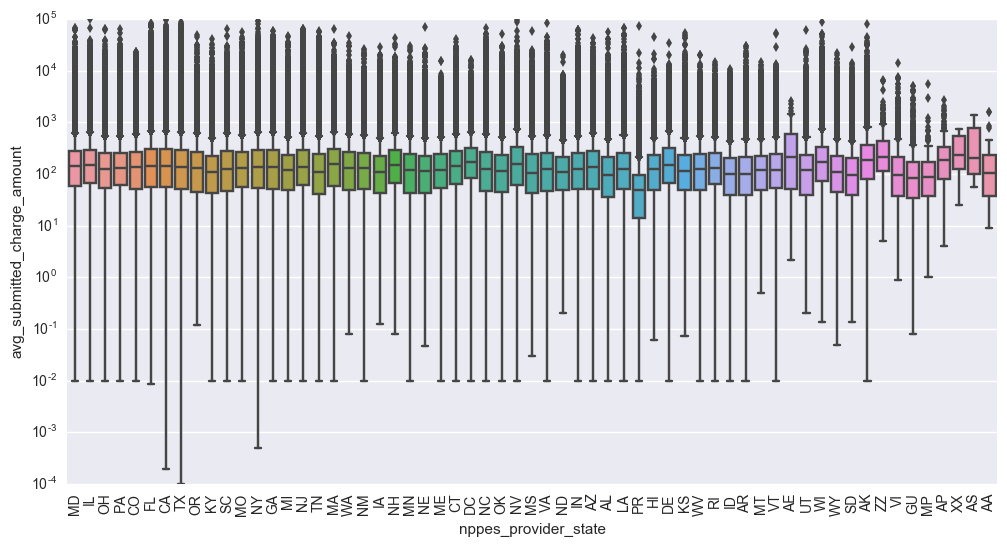

In [184]:
# Which states spend per procedure, on average

plt.figure(figsize=(12, 6))
ax = sns.boxplot(data=df, x='nppes_provider_state', y='avg_submitted_charge_amount')
ax.set(yscale='log')
for item in ax.get_xticklabels():
    item.set_rotation(90)

In [293]:
# lots of charges are under a dollar, create a df which omits them
df_dollar = df[df.avg_submitted_charge_amount > 1]

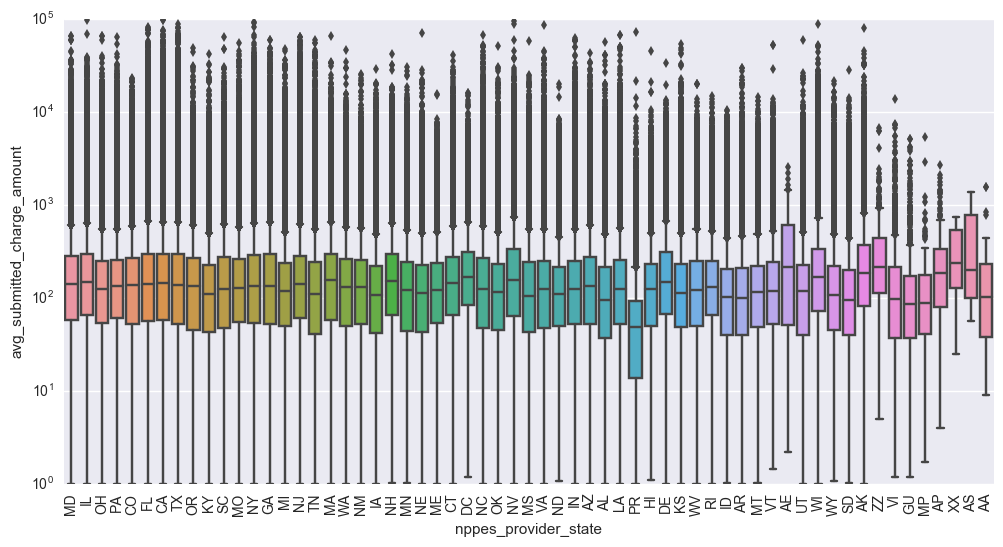

In [294]:
# plot again, ignoring the many claims which are like $0.01

plt.figure(figsize=(12, 6))
ax = sns.boxplot(data=df_dollar, x='nppes_provider_state', y='avg_submitted_charge_amount')
ax.set(yscale='log')
for item in ax.get_xticklabels():
    item.set_rotation(90)

In [261]:
# Which charges deviate significantly from the mean?

df['avg_submitted_charge_delta'] = df.apply(lambda row: row.avg_submitted_charge_amount - mean_costs_dict[row.hcpcs_code], axis=1)

0    134.124219
1    212.026971
2     24.033522
3     64.892577
4     92.607886
5     60.160586
6     95.433565
7   -111.714081
8     12.317743
9     -0.319122
Name: avg_submitted_charge_delta, dtype: float64

In [263]:
# where are these (no point in looking at code, since will come out in the wash)

state_diffs = df.pivot_table(values='avg_submitted_charge_delta', index='nppes_provider_state')
make_plotly(state_diffs, 'Average State differences from mean cost')

In [276]:
state_diffs_over_dollar = df_dollar.pivot_table(values='avg_submitted_charge_delta', index='nppes_provider_state')
make_plotly(state_diffs_over_dollar, 'Average State differences from mean cost (for charges over $1)')

In [289]:
# Differences in submitted charge and accepted charge

allowed_diff = df.pivot_table(values='avg_medicare_allowed_amount', index='nppes_provider_state') - state_diffs
payment_diff = df.pivot_table(values='avg_medicare_payment_amount', index='nppes_provider_state') - state_diffs

In [290]:
make_plotly(allowed_diff, 'Cost difference submitted vs. allowed')

In [291]:
make_plotly(payment_diff, 'Cost difference submitted vs. paid')

In [292]:
# Something funky is happening in wisconsin and alaska... we should figure that out. but wait!

# So that was lots of analysis... what do we model?

Yeah, medicare costs are standardized... and there isn't much distinctive about each claim in this file... so there isn't a ton to predict here...

Oops.